In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load and investigate the data

In [3]:
# load and investigate the data here
df = pd.read_csv('tennis_stats.csv')
print(df.head())

                 Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2      

## Exploratory analysis

In [5]:
# perform exploratory analysis here:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

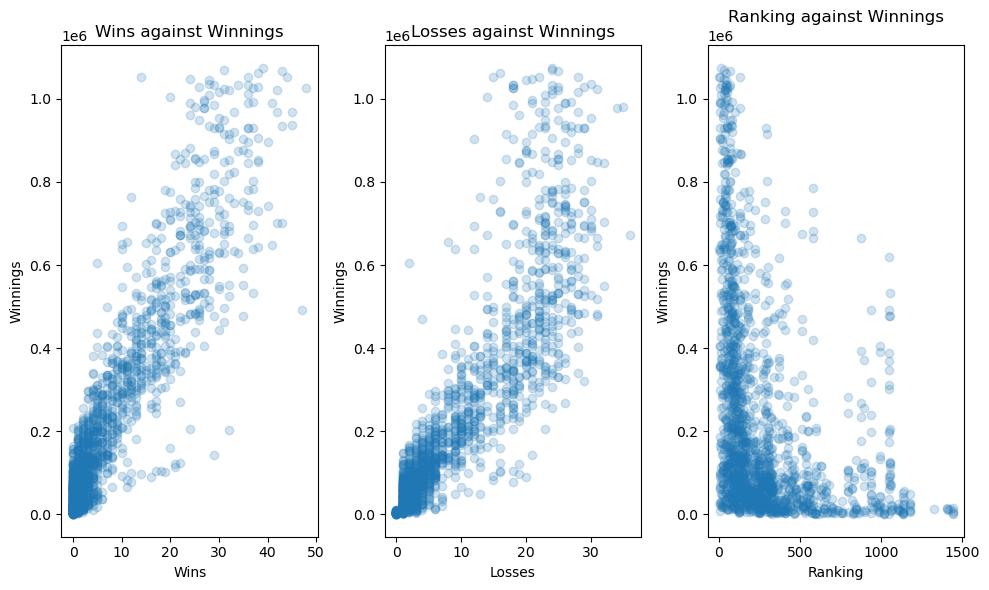

<Figure size 640x480 with 0 Axes>

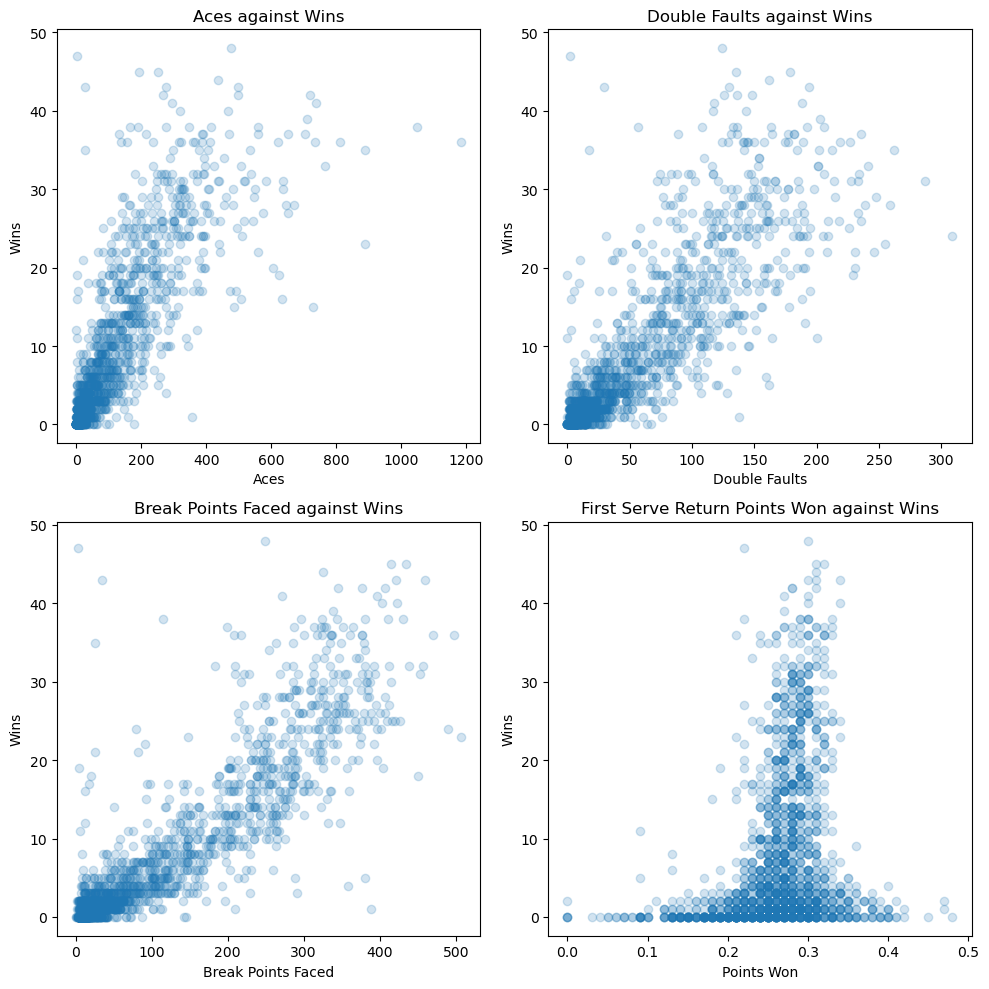

<Figure size 640x480 with 0 Axes>

In [52]:
wins = df.Wins # number of matches won in a year
losses = df.Losses # number of matches lost in a year
winnings = df.Winnings # total winnings in USD($) in a year
ranking = df.Ranking # ranking at the end of year
aces = df.Aces # number of serves by the player where the receiver does not touch the ball
doubleFaults = df.DoubleFaults # number of times player missed both first and second serve attempts
breakPointsFaced = df.BreakPointsFaced # number of times where the receiver could have won service game of the player
firstServeReturnPointsWon = df.FirstServeReturnPointsWon # % of opponents first-serve points the player was able to win

# first plots, winnings
fig, axs = plt.subplots(1, 3, figsize=(10, 6))
alpha_value = 0.2

# Plot 1
axs[0].scatter(wins, winnings, alpha = alpha_value)
axs[0].set_title('Wins against Winnings')
axs[0].set_xlabel('Wins')
axs[0].set_ylabel('Winnings')

# Plot 2
axs[1].scatter(losses, winnings, alpha = alpha_value)
axs[1].set_title('Losses against Winnings')
axs[1].set_xlabel('Losses')
axs[1].set_ylabel('Winnings')

# Plot 3
axs[2].scatter(ranking, winnings, alpha = alpha_value)
axs[2].set_title('Ranking against Winnings')
axs[2].set_xlabel('Ranking')
axs[2].set_ylabel('Winnings')

# Adjust layout
plt.tight_layout()
plt.show()
plt.clf()

# second plots, wins
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot 1
axs[0, 0].scatter(aces, wins, alpha = alpha_value)
axs[0, 0].set_title('Aces against Wins')
axs[0, 0].set_xlabel('Aces')
axs[0, 0].set_ylabel('Wins')

# Plot 2
axs[0, 1].scatter(doubleFaults, wins, alpha = alpha_value)
axs[0, 1].set_title('Double Faults against Wins')
axs[0, 1].set_xlabel('Double Faults')
axs[0, 1].set_ylabel('Wins')

# Plot 3
axs[1, 0].scatter(breakPointsFaced, wins, alpha = alpha_value)
axs[1, 0].set_title('Break Points Faced against Wins')
axs[1, 0].set_xlabel('Break Points Faced')
axs[1, 0].set_ylabel('Wins')

# Plot 4
axs[1, 1].scatter(firstServeReturnPointsWon, wins, alpha = alpha_value)
axs[1, 1].set_title('First Serve Return Points Won against Wins')
axs[1, 1].set_xlabel('Points Won')
axs[1, 1].set_ylabel('Wins')

# Adjust layout
plt.tight_layout()
plt.show()
plt.clf()

## Single feature linear regression (Ranking against Winnings)

The score equals 0.144


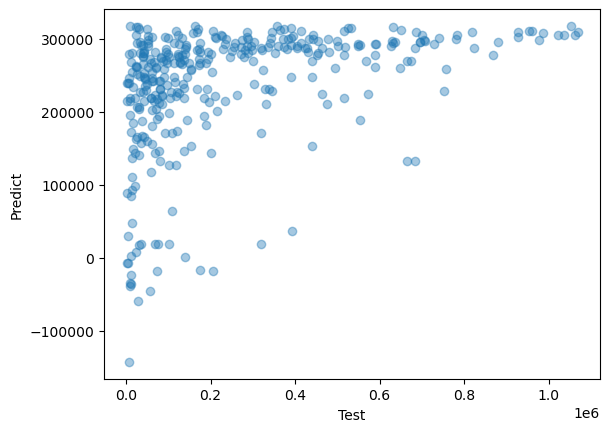

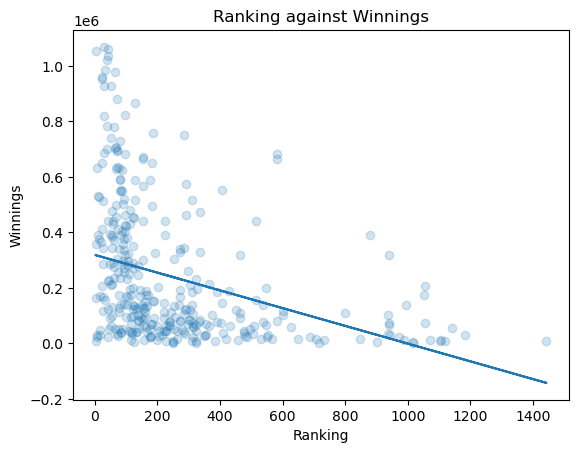

<Figure size 640x480 with 0 Axes>

In [49]:
## perform single feature linear regression here:
features = ranking.values.reshape(-1, 1)
outcome = winnings.values.reshape(-1, 1)
features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8)

model = LinearRegression()
model.fit(features_train, outcome_train)

print(f'The score equals {round(model.score(features_test, outcome_test), 3)}')

prediction = model.predict(features_test)
plt.scatter(outcome_test, prediction, alpha=0.4)
plt.xlabel('Test')
plt.ylabel('Predict')
plt.show()
plt.clf()

plt.scatter(features_test, outcome_test, alpha = alpha_value)
plt.plot(features_test, prediction)
plt.title('Ranking against Winnings')
plt.xlabel('Ranking')
plt.ylabel('Winnings')
plt.show()
plt.clf()

Though we managed to build a linear regression for Winnings against Ranking, we see that the score of such model is pretty low. That tells us that the dependence between two variables is poorly described as linear.

## Two feature linear regression (Wins and Losses against Winnings)


The score equals 0.838


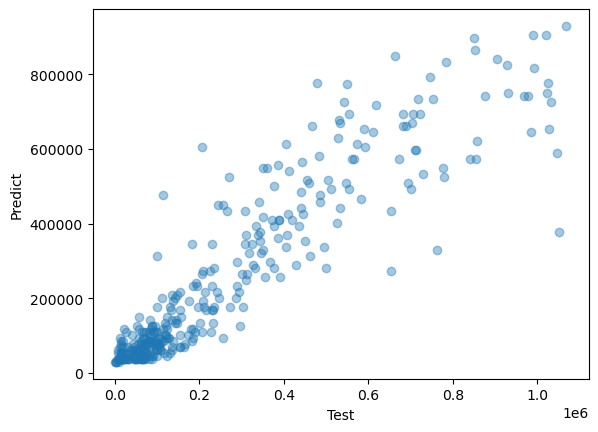

<Figure size 640x480 with 0 Axes>

In [47]:
## perform two feature linear regression here:
# Create a DataFrame from the two arrays as columns
features = pd.DataFrame({
    'Wins': wins,
    'Losses': losses
})

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8)

model = LinearRegression()
model.fit(features_train, outcome_train)

print(f'The score equals {round(model.score(features_test, outcome_test), 3)}')

prediction = model.predict(features_test)
plt.scatter(outcome_test, prediction, alpha=0.4)
plt.xlabel('Test')
plt.ylabel('Predict')
plt.show()
plt.clf()

We managed to build a linear regression for Wins and Losses against Winnings and we see that the score of such model is pretty high. That tells us that the dependence between two variables is well described as linear.

## Multiple feature linear regressions

The score equals 0.792


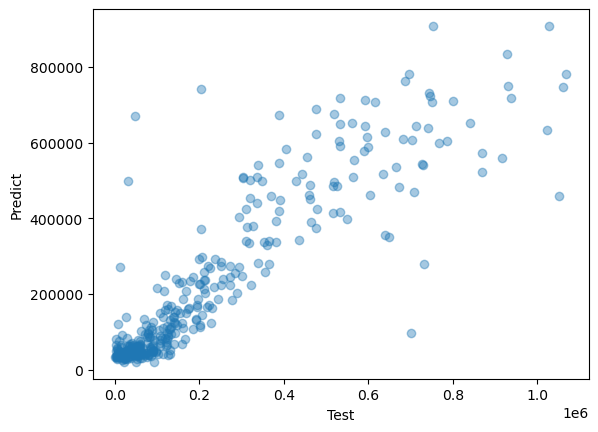

<Figure size 640x480 with 0 Axes>

In [45]:
## perform multiple feature linear regression here:
# Create a DataFrame from the multiple arrays as columns
features = pd.DataFrame({
    'Aces': aces,
    'DoubleFaults': doubleFaults,
    'BreakPointsFaced': breakPointsFaced,
    'FirstServeReturnPointsWon': firstServeReturnPointsWon
})

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8)

model = LinearRegression()
model.fit(features_train, outcome_train)

print(f'The score equals {round(model.score(features_test, outcome_test), 3)}')

prediction = model.predict(features_test)
plt.scatter(outcome_test, prediction, alpha=0.4)
plt.xlabel('Test')
plt.ylabel('Predict')
plt.show()
plt.clf()

We managed to build a linear regression for Aces, Double Faults, Break Points Faced and First Serve Return Points Won against Winnings and we see that the score of such model is pretty high. That tells us that the dependence between two variables is well described as linear.